https://www.kaggle.com/datasets/karltse/construction-machinery-sales-dataset?resource=download

#Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Tableau Portfolio/Sales Performance.xlsx')

In [ ]:
df.head(10)

,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant
0,paid,9,Oct,Company Website,AD01-9362,4.0,100000.0,1,0 days 00:08:00,Crane,Fndn. L5,AZ,Mohammed,Kenza
1,Paid,4,May,Company Website,AD01-9362,4.0,55000.0,1,0 days 00:11:20,Crane,Pre. L3,AZ,Mohammed,Kenza
2,Paid,3,Nov,Direct Call,AD01-9361,4.0,55000.0,6,0 days 00:02:00,Crane,Fndn. L5,AZ,Abdullah,Reham
3,Paid,12,Jan,Company Website,AD01-9361,2.0,600000.0,1,0 days 00:02:00,Excavator,Fndn. L5,AZ,Mohammed,Kenza
4,Paid,30,Oct,Company Website,AD01-9362,2.0,600000.0,1,0 days 00:03:40,Excavator,Pre. L3,AZ,Abdullah,Hisham
5,Paid,12,Jun,Company Website,AD01-9362,3.0,750000.0,3,0 days 00:10:10,Excavator,Pre. L4,AZ,Abdullah,Hisham
6,Paid,11,Aug,Company Website,AD01-9361,1.0,350000.0,6,0 days 00:12:45,Excavator,Fndn. L5,AZ,Mohammed,Kenza
7,Paid,10,Jan,Facebook Page,AD01-9362,2.0,600000.0,1,0 days 00:02:00,Excavator,KJI. L4,AZ,Abdullah,Adam
8,Paid,30,Nov,Direct Call,AD01-9364,3.0,750000.0,1,0 days 00:02:30,Excavator,Fndn. L5,AZ,Abdullah,Reham
9,Paid,10,Jul,Direct Call,AD01-9361,1.0,350000.0,1,0 days 00:02:30,Excavator,Pre. L2,AZ,Salah,Dary


In [ ]:
#Check data type, make sure pandas read correctly
df.info()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Fees Status            1341 non-null   object         
 1   Day                    1341 non-null   int64          
 2   Month                  1341 non-null   object         
 3   Advertising Channel    1341 non-null   object         
 4   Advertisement          1341 non-null   object         
 5   Enrolled Courses       1030 non-null   float64        
 6   Paid Fees              1030 non-null   float64        
 7   Number of phone calls  1341 non-null   int64          
 8   Average call duration  1341 non-null   timedelta64[ns]
 9   Training Models        1030 non-null   object         
 10  Training Levels        1030 non-null   object         
 11  Location               1341 non-null   object         
 12  Sale Team              1341 non-null   object   

### Null value is consistent for column Enrolled Courses,Paid Fees,Training Models,Training Levels.
So assumeing those Null value is due to non payment

#Data Pre-processing

## Question 1: Is there any missing values?

In [ ]:
# Check the number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Fees Status                0
Day                        0
Month                      0
Advertising Channel        0
Advertisement              0
Enrolled Courses         311
Paid Fees                311
Number of phone calls      0
Average call duration      0
Training Models          311
Training Levels          311
Location                   0
Sale Team                  0
Consultant                 0
dtype: int64


In [ ]:
# Check the percentage of missing values per column
print("\nPercentage of missing values per column:")
print(df.isnull().sum() / len(df) * 100)


Percentage of missing values per column:
Fees Status               0.000000
Day                       0.000000
Month                     0.000000
Advertising Channel       0.000000
Advertisement             0.000000
Enrolled Courses         23.191648
Paid Fees                23.191648
Number of phone calls     0.000000
Average call duration     0.000000
Training Models          23.191648
Training Levels          23.191648
Location                  0.000000
Sale Team                 0.000000
Consultant                0.000000
dtype: float64


In [ ]:
df.columns

Index(['Fees Status', 'Day', 'Month', 'Advertising Channel', 'Advertisement ',
       'Enrolled Courses', 'Paid Fees', 'Number of phone calls',
       'Average call duration', 'Training Models', 'Training Levels',
       'Location', 'Sale Team', 'Consultant'],
      dtype='object')

In [ ]:
df[df['Paid Fees'].isna()]

,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant
33,Not Paid,3,Jun,Company Website,AD01-9361,NaN,NaN,2,0 days 00:02:00,NaN,NaN,AZ,Mohammed,Kisho
34,Not Paid,22,Oct,Direct Call,AD01-9364,NaN,NaN,1,0 days 00:02:00,NaN,NaN,AZ,Mohammed,Rony
35,Not Paid,23,Dec,Direct Call,AD01-9362,NaN,NaN,5,0 days 00:03:12,NaN,NaN,AZ,Mohammed,Rony
36,Not Paid,5,Oct,Google Ad,AD01-9363,NaN,NaN,4,0 days 00:08:00,NaN,NaN,AZ,Abdullah,Hisham
37,Not Paid,12,Jun,Direct Call,AD01-9362,NaN,NaN,2,0 days 00:04:48,NaN,NaN,AZ,Abdullah,Adam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,Not Paid,23,Sep,Direct Call,AD01-9361,NaN,NaN,3,0 days 00:06:30,NaN,NaN,Washington,Salah,Sahar
1337,Not Paid,10,Jul,Direct Call,AD01-9361,NaN,NaN,3,0 days 00:08:40,NaN,NaN,Washington,Ahmed,Khalil
1338,Not Paid,12,Aug,Direct Call,AD01-9363,NaN,NaN,1,0 days 00:08:40,NaN,NaN,Washington,Salah,Ahmed
1339,Not Paid,11,Nov,Youtube Channel,AD01-9362,NaN,NaN,4,0 days 00:02:00,NaN,NaN,Washington,Mohammed,Kisho


In [ ]:
#Make sure all values are null
df[df['Paid Fees'].isna()][['Enrolled Courses','Paid Fees','Training Models','Training Levels']].isnull().sum()


,0
Enrolled Courses,311
Paid Fees,311
Training Models,311
Training Levels,311


Since those Null value do have meaning, so make no actions here

## Question 2: Is there any discrepencies for any columns?

###Check if data values are consistent for categorical columns-->

In [ ]:
#  find Fee Status ,Locations have some discrencies
print("\nDescriptive Statistics for Non-Numeric Columns:")
print(df.describe(include='object'))

print('\n\n\n')
print(f"Fee Status have {df['Fees Status'].nunique()} unique values:{df['Fees Status'].unique()}")

print(f"Advertising Channel have {df['Advertising Channel'].nunique()} :{df['Advertising Channel'].unique()}")

print(f"Advertisement have {df['Advertisement '].nunique()} : {df['Advertisement '].unique()}")

print(f"Training Models have {df['Training Models'].nunique()} : {df['Training Models'].unique()}")

print(f"Training Levels have {df['Training Levels'].nunique()} : {df['Training Levels'].unique()}")

print(f"Location have {df['Location'].nunique()} : {df['Location'].unique()}")


print(f"Sale Team have {df['Sale Team'].nunique()} : {df['Sale Team'].unique()}")


print(f"Consultant have {df['Consultant'].nunique()} : {df['Consultant'].unique()}")




Descriptive Statistics for Non-Numeric Columns:
       Fees Status Month Advertising Channel Advertisement  Training Models  \
count         1341  1341                1341           1341            1030   
unique           4    12                   5              5               4   
top           Paid   Oct         Direct Call      AD01-9362       Excavator   
freq          1001   304                 758            518             706   

       Training Levels  Location Sale Team Consultant  
count             1030      1341      1341       1341  
unique               9         6         4         16  
top            KJI. L4  New York     Salah     Mohmed  
freq               221       564       448        130  




Fee Status have 4 unique values:['paid' 'Paid' 'Not Paid' 'not Paid']
Advertising Channel have 5 :['Company Website' 'Direct Call' 'Facebook Page' 'Google Ad'
 'Youtube Channel']
Advertisement have 5 : ['AD01-9362' 'AD01-9361' 'AD01-9364' 'AD01-9363' 'AD01-9365']
Trainin

In [ ]:
# Handling discrencies
df['Fees Status'] = df['Fees Status'].replace('paid', 'Paid', regex=False)
df['Fees Status'] = df['Fees Status'].replace('not Paid', 'Not Paid', regex=False)
print(df['Fees Status'].unique())

df['Location'] = df['Location'].replace('AZ', 'Arizona', regex=False)
df['Location'] = df['Location'].replace('TX', 'Texas', regex=False)
print(df['Location'].unique())


['Paid' 'Not Paid']
['Arizona' 'California' 'New York' 'Oregon' 'Texas' 'Washington']


###Check Numeric value discrepencies


In [ ]:
# Display descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())







Descriptive Statistics for Numeric Columns:
               Day  Enrolled Courses     Paid Fees  Number of phone calls  \
count  1341.000000       1030.000000  1.030000e+03            1341.000000   
mean     14.801641          2.905825  5.585515e+05               2.530947   
std       9.335746          1.291320  3.895433e+05               1.445520   
min       1.000000          1.000000  9.500000e+03               1.000000   
25%       8.000000          2.000000  1.900000e+05               1.000000   
50%      13.000000          3.000000  6.000000e+05               2.000000   
75%      23.000000          4.000000  7.500000e+05               4.000000   
max      31.000000          5.000000  2.950000e+06               7.000000   

           Average call duration  
count                       1341  
mean   0 days 00:04:35.353467561  
std    0 days 00:03:11.554525296  
min              0 days 00:02:00  
25%              0 days 00:02:00  
50%              0 days 00:03:10  
75%             

In [ ]:
#-make sure day is correct , less than 31
print(f"Day have {df['Day'].nunique()} unique values: {df['Day'].unique()}")

print(f"Enrolled Courses {df['Enrolled Courses'].nunique()} unique values: {df['Enrolled Courses'].unique()}")
#
print(f"Paid Fees {df['Paid Fees'].nunique()} unique values: {df['Paid Fees'].unique()}")
#
print(f"Number of phone calls have {df['Number of phone calls'].nunique()} unique values: {df['Number of phone calls'].unique()}")

print(f"Average call duration have {df['Average call duration'].nunique()} unique values: {df['Average call duration'].unique()}")


Day have 31 unique values: [ 9  4  3 12 30 11 10 18  5 28 22  1 25 13 17 27 23 16  2 19 15 20 29 21
 26  8 14  6  7 24 31]
Enrolled Courses 5 unique values: [ 4.  2.  3.  1.  5. nan]
Paid Fees 22 unique values: [ 100000.   55000.  600000.  750000.  350000. 1050000.  500000. 1250000.
 1000000.  190000.   95000.   50000.      nan   35000.  550000. 1900000.
   60000.   19000.   75000.  125000.    9500.  105000. 2950000.]
Number of phone calls have 7 unique values: [1 6 3 2 4 5 7]
Average call duration have 43 unique values: <TimedeltaArray>
['0 days 00:08:00', '0 days 00:11:20', '0 days 00:02:00', '0 days 00:03:40',
 '0 days 00:10:10', '0 days 00:12:45', '0 days 00:02:30', '0 days 00:02:50',
 '0 days 00:02:10', '0 days 00:06:15', '0 days 00:06:18', '0 days 00:08:12',
 '0 days 00:09:12', '0 days 00:07:14', '0 days 00:03:30', '0 days 00:03:12',
 '0 days 00:04:48', '0 days 00:08:10', '0 days 00:03:17', '0 days 00:02:18',
 '0 days 00:03:16', '0 days 00:02:25', '0 days 00:04:45', '0 days 00:08

### Change Average call duration Data Type

In [ ]:
def timedelta_to_seconds(timedelta_obj):

    # Check if the input is a Timedelta object
    if isinstance(timedelta_obj, pd.Timedelta):
        # Use the .total_seconds() method to get the duration in seconds
        return timedelta_obj.total_seconds()
    else:
        # Handle cases where the input might not be a Timedelta object
        print(f"Warning: Input is not a Timedelta object: {type(timedelta_obj)}")
        return None


# Apply the function to the 'Average call duration' column
df['Duration in Seconds'] = df['Average call duration'].apply(timedelta_to_seconds)
df['Duration in Mins'] = df['Average call duration'].apply(timedelta_to_seconds)/60

In [ ]:
df[['Duration in Seconds','Average call duration','Duration in Mins'] ]

,Duration in Seconds,Average call duration,Duration in Mins
0,480.0,0 days 00:08:00,8.000000
1,680.0,0 days 00:11:20,11.333333
2,120.0,0 days 00:02:00,2.000000
3,120.0,0 days 00:02:00,2.000000
4,220.0,0 days 00:03:40,3.666667
...,...,...,...
1336,390.0,0 days 00:06:30,6.500000
1337,520.0,0 days 00:08:40,8.666667
1338,520.0,0 days 00:08:40,8.666667
1339,120.0,0 days 00:02:00,2.000000


## Question 3 If data have any outliers?

In [ ]:
df.describe()

,Day,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Duration in Seconds,Duration in Mins
count,1341.000000,1030.000000,1.030000e+03,1341.000000,1341,1341.000000,1341.000000
mean,14.801641,2.905825,5.585515e+05,2.530947,0 days 00:04:35.353467561,275.353468,4.589224
std,9.335746,1.291320,3.895433e+05,1.445520,0 days 00:03:11.554525296,191.554525,3.192575
min,1.000000,1.000000,9.500000e+03,1.000000,0 days 00:02:00,120.000000,2.000000
25%,8.000000,2.000000,1.900000e+05,1.000000,0 days 00:02:00,120.000000,2.000000
50%,13.000000,3.000000,6.000000e+05,2.000000,0 days 00:03:10,190.000000,3.166667
75%,23.000000,4.000000,7.500000e+05,4.000000,0 days 00:06:30,390.000000,6.500000
max,31.000000,5.000000,2.950000e+06,7.000000,0 days 00:12:55,775.000000,12.916667


In [ ]:
def find_outliers_iqr(df, column_name):
    # Check if the column exists and is numeric
    if column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found in DataFrame.")
        return pd.Series(dtype=float) # Return empty series

    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Warning: Column '{column_name}' is not numeric. Skipping outlier detection.")
        return pd.Series(dtype=df[column_name].dtype) # Return empty series of original type

    # Drop NaN values for quartile calculation, as they can affect results
    column_data = df[column_name].dropna()

    if column_data.empty:
        print(f"Warning: Column '{column_name}' contains only NaN values after dropping them. Skipping outlier detection.")
        return pd.Series(dtype=float)

    # Calculate Q1 (25th percentile)
    q1 = column_data.quantile(0.25)
    # Calculate Q3 (75th percentile)
    q3 = column_data.quantile(0.75)
    # Calculate IQR (Interquartile Range)
    iqr = q3 - q1

    # Define the outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"\n--- Outlier Analysis for Column: {column_name} ---")
    print(f"Q1: {q1:.2f}")
    print(f"Q3: {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

    # Identify outliers
    # We use the original column from the df (including NaNs) to filter,
    # so that the indices match the original DataFrame.
    outliers = df[
        (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    ][column_name]

    if outliers.empty:
        print("No outliers found.")
    else:
        print(f"Outliers found:\n{outliers}")

    return outliers

In [ ]:
df.describe()

,Day,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Duration in Seconds,Duration in Mins
count,1341.000000,1030.000000,1.030000e+03,1341.000000,1341,1341.000000,1341.000000
mean,14.801641,2.905825,5.585515e+05,2.530947,0 days 00:04:35.353467561,275.353468,4.589224
std,9.335746,1.291320,3.895433e+05,1.445520,0 days 00:03:11.554525296,191.554525,3.192575
min,1.000000,1.000000,9.500000e+03,1.000000,0 days 00:02:00,120.000000,2.000000
25%,8.000000,2.000000,1.900000e+05,1.000000,0 days 00:02:00,120.000000,2.000000
50%,13.000000,3.000000,6.000000e+05,2.000000,0 days 00:03:10,190.000000,3.166667
75%,23.000000,4.000000,7.500000e+05,4.000000,0 days 00:06:30,390.000000,6.500000
max,31.000000,5.000000,2.950000e+06,7.000000,0 days 00:12:55,775.000000,12.916667


In [ ]:

print(find_outliers_iqr(df,'Day'))
print(find_outliers_iqr(df,'Paid Fees'))

print(find_outliers_iqr(df,'Number of phone calls'))

print(find_outliers_iqr(df,'Duration in Mins'))



--- Outlier Analysis for Column: Day ---
Q1: 8.00
Q3: 23.00
IQR: 15.00
Lower Bound (Q1 - 1.5*IQR): -14.50
Upper Bound (Q3 + 1.5*IQR): 45.50
No outliers found.
Series([], Name: Day, dtype: int64)

--- Outlier Analysis for Column: Paid Fees ---
Q1: 190000.00
Q3: 750000.00
IQR: 560000.00
Lower Bound (Q1 - 1.5*IQR): -650000.00
Upper Bound (Q3 + 1.5*IQR): 1590000.00
Outliers found:
134     1900000.0
135     1900000.0
527     1900000.0
528     1900000.0
1106    2950000.0
1107    1900000.0
1108    1900000.0
Name: Paid Fees, dtype: float64
134     1900000.0
135     1900000.0
527     1900000.0
528     1900000.0
1106    2950000.0
1107    1900000.0
1108    1900000.0
Name: Paid Fees, dtype: float64

--- Outlier Analysis for Column: Number of phone calls ---
Q1: 1.00
Q3: 4.00
IQR: 3.00
Lower Bound (Q1 - 1.5*IQR): -3.50
Upper Bound (Q3 + 1.5*IQR): 8.50
No outliers found.
Series([], Name: Number of phone calls, dtype: int64)

--- Outlier Analysis for Column: Duration in Mins ---
Q1: 2.00
Q3: 6.50
IQ

In [ ]:
outlier_Paid_Fees = df.loc[find_outliers_iqr(df,'Paid Fees').index]
outlier_Paid_Fees


--- Outlier Analysis for Column: Paid Fees ---
Q1: 190000.00
Q3: 750000.00
IQR: 560000.00
Lower Bound (Q1 - 1.5*IQR): -650000.00
Upper Bound (Q3 + 1.5*IQR): 1590000.00
Outliers found:
134     1900000.0
135     1900000.0
527     1900000.0
528     1900000.0
1106    2950000.0
1107    1900000.0
1108    1900000.0
Name: Paid Fees, dtype: float64


,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant,Duration in Seconds,Duration in Mins
134,Paid,20,Oct,Direct Call,AD01-9361,2.0,1900000.0,1,0 days 00:02:00,Tower Crane,KJI. L4,California,Ahmed,Hany,120.0,2.000000
135,Paid,20,Nov,Direct Call,AD01-9362,2.0,1900000.0,4,0 days 00:03:12,Tower Crane,KJI. L4,California,Ahmed,Hany,192.0,3.200000
527,Paid,11,Sep,Direct Call,AD01-9364,2.0,1900000.0,1,0 days 00:04:00,Tower Crane,Fndn. L1,New York,Mohammed,Habib,240.0,4.000000
528,Paid,10,May,Direct Call,AD01-9364,2.0,1900000.0,2,0 days 00:07:30,Tower Crane,Pre. L2,New York,Mohammed,Mohmed,450.0,7.500000
1106,Paid,28,Sep,Direct Call,AD01-9361,1.0,2950000.0,4,0 days 00:02:00,Tower Crane,Fndn. L3,Texas,Ahmed,Khalil,120.0,2.000000
1107,Paid,10,May,Direct Call,AD01-9364,2.0,1900000.0,2,0 days 00:07:30,Tower Crane,Pre. L2,Texas,Mohammed,Mohmed,450.0,7.500000
1108,Paid,10,Sep,Direct Call,AD01-9362,2.0,1900000.0,2,0 days 00:08:10,Tower Crane,Pre. L2,Texas,Salah,John,490.0,8.166667


In [ ]:
#Determin if it is really outliers
print(df.groupby('Training Models')['Paid Fees'].median().reset_index())

print(df.groupby('Advertising Channel')['Paid Fees'].median().reset_index())

  Training Models  Paid Fees
0           Crane   100000.0
1       Excavator   750000.0
2     Tower Crane  1900000.0
3           Truck    95000.0
  Advertising Channel  Paid Fees
0     Company Website   600000.0
1         Direct Call   600000.0
2       Facebook Page   600000.0
3           Google Ad   600000.0
4     Youtube Channel   600000.0


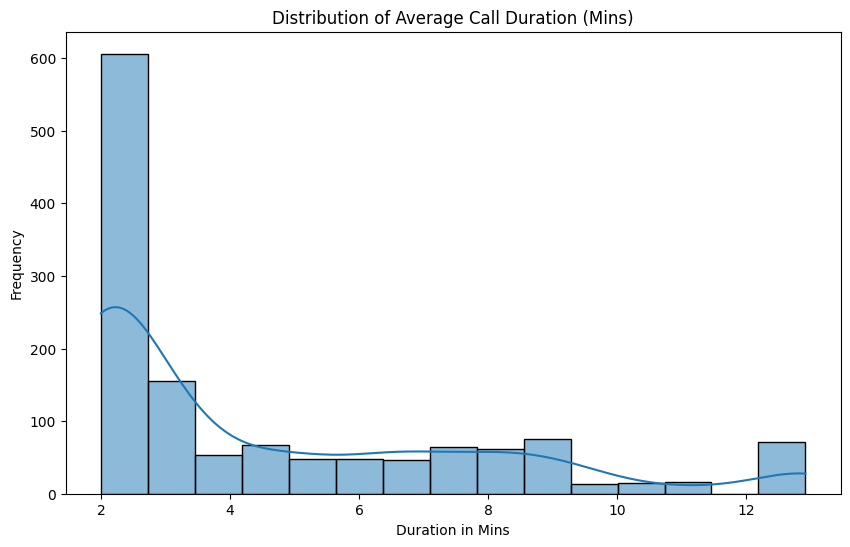

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration in Mins'].dropna(), bins=15, kde=True) # Use .dropna() to handle potential NaNs
plt.title('Distribution of Average Call Duration (Mins)')
plt.xlabel('Duration in Mins')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# Define the bin edges in seconds.
# Start from 0, include upper limits of 60, 180, 300, and go up to infinity for the last group.
bins = [0, 4, 9, 12, np.inf]

labels = ['0-4 min', '4-9 min', '9-12 min', '12+ min']

# Create the new column 'Call Duration Group' using pd.cut()
# right=True means the intervals are inclusive on the right edge (e.g., (60, 180] includes 180)
df['Call Duration Mins Group'] = pd.cut(df['Duration in Mins'], bins=bins, labels=labels, right=True)

# df['Call Duration Mins Group']


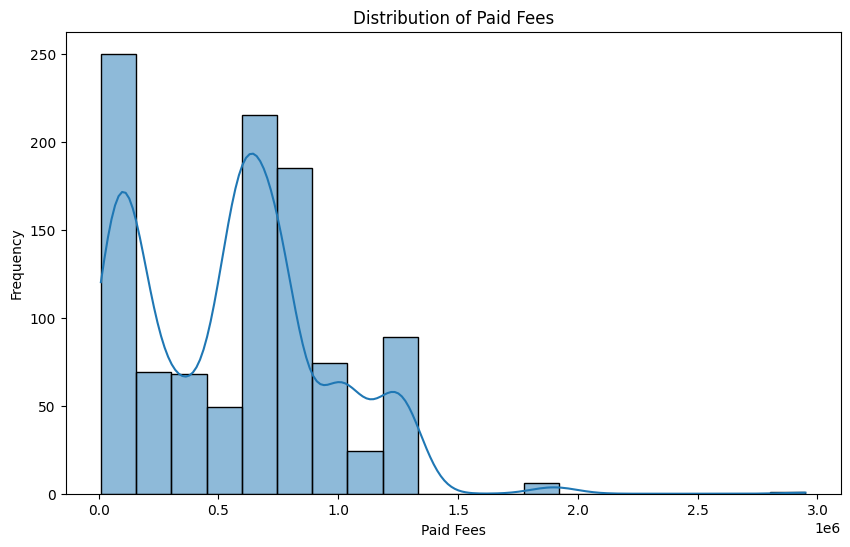

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Paid Fees'].dropna(), bins=20, kde=True)
plt.title('Distribution of Paid Fees')
plt.xlabel('Paid Fees')
plt.ylabel('Frequency')
plt.show()



In [ ]:
print(df.groupby('Training Models')['Paid Fees'].mean().reset_index())
print(df.groupby('Advertising Channel')['Paid Fees'].mean().reset_index())
print(df.groupby('Sale Team')['Paid Fees'].mean().reset_index())
print(df.groupby('Call Duration Mins Group')['Paid Fees'].mean().reset_index())

#Seems like Tower Crane usually more expensive
#Ahmed ,Mohammed  team usualy have higher sales
#9-12 min usually related to  higher sales


#There is
#so not think those value are outliers, but also need to double check with teams


  Training Models     Paid Fees
0           Crane  8.286667e+04
1       Excavator  7.476700e+05
2     Tower Crane  2.050000e+06
3           Truck  1.111074e+05
  Advertising Channel      Paid Fees
0     Company Website  538685.714286
1         Direct Call  562913.200723
2       Facebook Page  596666.666667
3           Google Ad  529814.814815
4     Youtube Channel  572576.271186
  Sale Team      Paid Fees
0  Abdullah  566238.764045
1     Ahmed  557543.352601
2  Mohammed  581677.177177
3     Salah  532843.930636
  Call Duration Mins Group      Paid Fees
0                  0-4 min  560223.726115
1                  4-9 min  577782.456140
2                 9-12 min  655166.666667
3                  12+ min  342271.929825


<ipython-input-26-c1b30d88ff71>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Call Duration Mins Group')['Paid Fees'].mean().reset_index())


In [ ]:
# outlier_Paid_Fees

##Question 4 Check duplications

In [ ]:
df.shape


(1341, 17)

In [ ]:
#Check duplications acorss all columns
df[df.duplicated(keep=False)]


,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant,Duration in Seconds,Duration in Mins,Call Duration Mins Group
75,Paid,10,Jul,Direct Call,AD01-9362,1.0,350000.0,4,0 days 00:03:12,Excavator,KJI. L4,California,Salah,Dary,192.0,3.200000,0-4 min
77,Paid,10,Jul,Direct Call,AD01-9362,1.0,350000.0,4,0 days 00:03:12,Excavator,KJI. L4,California,Salah,Dary,192.0,3.200000,0-4 min
119,Paid,11,Jan,Direct Call,AD01-9365,3.0,750000.0,2,0 days 00:02:18,Excavator,KJI. L4,California,Abdullah,Reham,138.0,2.300000,0-4 min
120,Paid,11,Jan,Direct Call,AD01-9365,3.0,750000.0,2,0 days 00:02:18,Excavator,KJI. L4,California,Abdullah,Reham,138.0,2.300000,0-4 min
149,Paid,1,Oct,Company Website,AD01-9361,2.0,60000.0,2,0 days 00:12:55,Truck,KJI. L4,California,Mohammed,Kisho,775.0,12.916667,12+ min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Not Paid,13,Apr,Company Website,AD01-9362,NaN,NaN,4,0 days 00:03:10,NaN,NaN,Washington,Salah,Ahmed,190.0,3.166667,0-4 min
1323,Not Paid,12,Mar,Direct Call,AD01-9365,NaN,NaN,4,0 days 00:02:18,NaN,NaN,Washington,Mohammed,Mohmed,138.0,2.300000,0-4 min
1324,Not Paid,12,Mar,Direct Call,AD01-9365,NaN,NaN,4,0 days 00:02:18,NaN,NaN,Washington,Mohammed,Mohmed,138.0,2.300000,0-4 min
1329,Not Paid,3,Jul,Direct Call,AD01-9361,NaN,NaN,1,0 days 00:06:30,NaN,NaN,Washington,Mohammed,Rony,390.0,6.500000,4-9 min


In [ ]:
df_remove_duplication=df.drop_duplicates()
print(df_remove_duplication[df_remove_duplication.duplicated(keep=False)])

print(df_remove_duplication.shape)
print(df.shape)
print(f"Remove duplicated records {df.shape[0]-df_remove_duplication.shape[0]}")

Empty DataFrame
Columns: [Fees Status, Day, Month, Advertising Channel, Advertisement , Enrolled Courses, Paid Fees, Number of phone calls, Average call duration, Training Models, Training Levels, Location, Sale Team, Consultant, Duration in Seconds, Duration in Mins, Call Duration Mins Group]
Index: []
(1268, 17)
(1341, 17)
Remove duplicated records 73


## 5.Data Engineering

In [ ]:
# df_remove_duplication.head()
season_mapping = {
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'Jun': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Fall',
    'Oct': 'Fall',
    'Nov': 'Fall',
    'Dec': 'Winter'
}
df_remove_duplication['Season'] = df_remove_duplication['Month'].map(season_mapping)
df_remove_duplication



<ipython-input-31-c59bf730bb57>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove_duplication['Season'] = df_remove_duplication['Month'].map(season_mapping)


,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant,Duration in Seconds,Duration in Mins,Call Duration Mins Group,Season
0,Paid,9,Oct,Company Website,AD01-9362,4.0,100000.0,1,0 days 00:08:00,Crane,Fndn. L5,Arizona,Mohammed,Kenza,480.0,8.000000,4-9 min,Fall
1,Paid,4,May,Company Website,AD01-9362,4.0,55000.0,1,0 days 00:11:20,Crane,Pre. L3,Arizona,Mohammed,Kenza,680.0,11.333333,9-12 min,Spring
2,Paid,3,Nov,Direct Call,AD01-9361,4.0,55000.0,6,0 days 00:02:00,Crane,Fndn. L5,Arizona,Abdullah,Reham,120.0,2.000000,0-4 min,Fall
3,Paid,12,Jan,Company Website,AD01-9361,2.0,600000.0,1,0 days 00:02:00,Excavator,Fndn. L5,Arizona,Mohammed,Kenza,120.0,2.000000,0-4 min,Winter
4,Paid,30,Oct,Company Website,AD01-9362,2.0,600000.0,1,0 days 00:03:40,Excavator,Pre. L3,Arizona,Abdullah,Hisham,220.0,3.666667,0-4 min,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,Not Paid,23,Sep,Direct Call,AD01-9361,NaN,NaN,3,0 days 00:06:30,NaN,NaN,Washington,Salah,Sahar,390.0,6.500000,4-9 min,Fall
1337,Not Paid,10,Jul,Direct Call,AD01-9361,NaN,NaN,3,0 days 00:08:40,NaN,NaN,Washington,Ahmed,Khalil,520.0,8.666667,4-9 min,Summer
1338,Not Paid,12,Aug,Direct Call,AD01-9363,NaN,NaN,1,0 days 00:08:40,NaN,NaN,Washington,Salah,Ahmed,520.0,8.666667,4-9 min,Summer
1339,Not Paid,11,Nov,Youtube Channel,AD01-9362,NaN,NaN,4,0 days 00:02:00,NaN,NaN,Washington,Mohammed,Kisho,120.0,2.000000,0-4 min,Fall


In [ ]:
df_pre=df_remove_duplication.copy()

# Descriptive statistics
Questions want to answer:

Sales and inventory:

1.Seasonality: Are sales higher in certain seasons (e.g., spring/summer for construction)

2.which sale team perform the best? overall and brach?

3.Which model are most popular? overall and branch ?
Do certain city sell more of one type of machinery than another due to local market needs or expertise?

4.Is there any popular product sell only in certain place ? and why?

5.Which product drive most of revnue?

6.which sale team perform the best? overall and brach?

Marketing :


1.which channel have to bring us the most revenue?

2.which advitisement have bring us the most revenue?

3.What is  the efficiency of phone call for dollar amount overall?


4.Certain channe have high effciency to attract customer spending?
total revenue/total phone calls
total revenue/total phone duration

5.what are the traits of higher sale? any thing to learn?





## 1.Seasonality: Are sales higher in certain seasons (e.g., spring/summer


Fall is the best sell season for this year in  both transaction and revenue pespective

Sales Revnue is 2 .3 times of average of this year


In [ ]:
df_pre.head()

,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant,Duration in Seconds,Duration in Mins,Call Duration Mins Group,Season
0,Paid,9,Oct,Company Website,AD01-9362,4.0,100000.0,1,0 days 00:08:00,Crane,Fndn. L5,Arizona,Mohammed,Kenza,480.0,8.000000,4-9 min,Fall
1,Paid,4,May,Company Website,AD01-9362,4.0,55000.0,1,0 days 00:11:20,Crane,Pre. L3,Arizona,Mohammed,Kenza,680.0,11.333333,9-12 min,Spring
2,Paid,3,Nov,Direct Call,AD01-9361,4.0,55000.0,6,0 days 00:02:00,Crane,Fndn. L5,Arizona,Abdullah,Reham,120.0,2.000000,0-4 min,Fall
3,Paid,12,Jan,Company Website,AD01-9361,2.0,600000.0,1,0 days 00:02:00,Excavator,Fndn. L5,Arizona,Mohammed,Kenza,120.0,2.000000,0-4 min,Winter
4,Paid,30,Oct,Company Website,AD01-9362,2.0,600000.0,1,0 days 00:03:40,Excavator,Pre. L3,Arizona,Abdullah,Hisham,220.0,3.666667,0-4 min,Fall


In [ ]:
#Transaction amount pespective

Season_Transactions = df_pre.groupby(['Season'])['Paid Fees'].count().rename("Transaction count").reset_index().sort_values(by='Transaction count', ascending=False)
Avg_Transaction_Amount = Season_Transactions['Transaction count'].mean()
Season_Transactions['Rate vs Avg Year'] = Season_Transactions['Transaction count']/Avg_Transaction_Amount


Season_Revenue = df_pre.groupby(['Season'])['Paid Fees'].sum().rename("ToTal Revenue").reset_index().sort_values(by='ToTal Revenue', ascending=False)
Avg_Revenue_Amount = Season_Revenue['ToTal Revenue'].mean()
Season_Revenue['Rate vs Avg Year'] = Season_Revenue['ToTal Revenue']/Avg_Revenue_Amount

# Season_Transactions[Season_Transactions['Season'] == 'Fall'].iloc[0]


print(Season_Transactions)
print(Season_Revenue)




   Season  Transaction count  Rate vs Avg Year
0    Fall                561          2.301538
3  Winter                189          0.775385
2  Summer                125          0.512821
1  Spring                100          0.410256
   Season  ToTal Revenue  Rate vs Avg Year
0    Fall    327346000.0          2.366290
3  Winter    104651000.0          0.756492
2  Summer     61619000.0          0.445426
1  Spring     59733000.0          0.431793


## 2.which sale team perform the best? overall and brach? Model wise?
Salah Team perforam and Mohammed  Team outperform more than  1.3 times of average

break down by models:
Mohammed  Team and Salah Team outperform average in all 4 different models Training Models, about 5 times to average of all teams in Excavator model's sale

break down by Locations:
Top Sales Location was New York, Texas

In [ ]:
Sales_Team_Trsnsaction_Count = df_pre.groupby(['Sale Team'])['Paid Fees'].count().rename("Transaction count").reset_index().sort_values(by='Transaction count', ascending=False)
Avg_Transaction_Amount_Sales_Team = Sales_Team_Trsnsaction_Count['Transaction count'].mean()
Sales_Team_Trsnsaction_Count['Rate'] = Sales_Team_Trsnsaction_Count['Transaction count']/Avg_Transaction_Amount_Sales_Team


Sales_Team_Sale_Amount_Sum = df_pre.groupby(['Sale Team'])['Paid Fees'].sum().rename("Total Revenue Amount").reset_index().sort_values(by='Total Revenue Amount', ascending=False)
Avg_Sales_Amount = Sales_Team_Sale_Amount_Sum['Total Revenue Amount'].mean()
Sales_Team_Sale_Amount_Sum['Rate'] = Sales_Team_Sale_Amount_Sum['Total Revenue Amount']/Avg_Sales_Amount




print(Sales_Team_Trsnsaction_Count)
print('\n\n\n')
print(Sales_Team_Sale_Amount_Sum)

  Sale Team  Transaction count      Rate
3     Salah                329  1.349744
2  Mohammed                319  1.308718
1     Ahmed                164  0.672821
0  Abdullah                163  0.668718




  Sale Team  Total Revenue Amount      Rate
2  Mohammed           187943500.0  1.358589
3     Salah           177559000.0  1.283523
0  Abdullah            96076500.0  0.694509
1     Ahmed            91770000.0  0.663379


In [ ]:
def analyze_sales_metrics_multi(df, group_cols):

    # --- Data Quality Check: Ensure required columns exist ---
    # Ensure group_cols is a list for checking
    grouping_columns_list = [group_cols] if isinstance(group_cols, str) else group_cols

    required_cols = grouping_columns_list + ['Paid Fees']

    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        print(f"Error: Missing required column(s): {missing}")
        return None, None # Indicate failure by returning None

    # --- Calculate Transaction Count and Rate ---

    # Group by the specified column(s)
    grouped_counts = df.groupby(group_cols)['Paid Fees'].count().rename("Transaction count")

    # Reset index to turn the group keys into columns
    transaction_counts = grouped_counts.reset_index()

    # Calculate the mean of the transaction counts across all groups
    avg_transaction_count = transaction_counts['Transaction count'].mean()

    # Calculate the Rate vs Average for transaction count
    if avg_transaction_count == 0:
         transaction_counts['Rate vs Avg'] = np.nan # Or 0
    else:
         transaction_counts['Rate vs Avg'] = transaction_counts['Transaction count'] / avg_transaction_count

    # Sort by Transaction count
    transaction_counts = transaction_counts.sort_values(by='Transaction count', ascending=False)


    # --- Calculate Total Revenue Amount and Rate ---

    # Group by the specified column(s)
    grouped_sums = df.groupby(group_cols)['Paid Fees'].sum().rename("Total Revenue Amount")

    # Reset index to turn the group keys into columns
    total_revenue_amounts = grouped_sums.reset_index()

    # Calculate the mean of the total revenue amounts across all groups
    avg_revenue_amount = total_revenue_amounts['Total Revenue Amount'].mean()

    # Calculate the Rate vs Average for total revenue amount
    if avg_revenue_amount == 0:
        total_revenue_amounts['Rate vs Avg'] = np.nan # Or 0
    else:
        total_revenue_amounts['Rate vs Avg'] = total_revenue_amounts['Total Revenue Amount'] / avg_revenue_amount

    # Sort by Total Revenue Amount
    total_revenue_amounts = total_revenue_amounts.sort_values(by='Total Revenue Amount', ascending=False)


    return transaction_counts, total_revenue_amounts



In [ ]:
analyze_sales_metrics_multi(df_pre,['Sale Team', 'Training Models'])

(   Sale Team Training Models  Transaction count  Rate vs Avg
 8   Mohammed       Excavator                229     3.523077
 12     Salah       Excavator                220     3.384615
 1   Abdullah       Excavator                122     1.876923
 4      Ahmed       Excavator                104     1.600000
 14     Salah           Truck                 84     1.292308
 10  Mohammed           Truck                 62     0.953846
 6      Ahmed           Truck                 41     0.630769
 2   Abdullah           Truck                 31     0.476923
 7   Mohammed           Crane                 25     0.384615
 11     Salah           Crane                 24     0.369231
 3      Ahmed           Crane                 16     0.246154
 0   Abdullah           Crane                 10     0.153846
 5      Ahmed     Tower Crane                  3     0.046154
 9   Mohammed     Tower Crane                  3     0.046154
 13     Salah     Tower Crane                  1     0.015385,
    Sal

In [ ]:
# df_pre.head()
print(df_pre.groupby(['Training Models'])['Paid Fees'].mean()
)


Training Models
Crane          8.286667e+04
Excavator      7.526741e+05
Tower Crane    2.050000e+06
Truck          1.134358e+05
Name: Paid Fees, dtype: float64


In [ ]:
analyze_sales_metrics_multi(df_pre,['Sale Team', 'Location'])

(   Sale Team    Location  Transaction count  Rate vs Avg
 20     Salah    New York                132     3.249231
 14  Mohammed    New York                126     3.101538
 16  Mohammed       Texas                104     2.560000
 22     Salah       Texas                 93     2.289231
 8      Ahmed    New York                 79     1.944615
 2   Abdullah    New York                 69     1.698462
 4   Abdullah       Texas                 53     1.304615
 19     Salah  California                 42     1.033846
 21     Salah      Oregon                 42     1.033846
 10     Ahmed       Texas                 37     0.910769
 13  Mohammed  California                 33     0.812308
 15  Mohammed      Oregon                 30     0.738462
 7      Ahmed  California                 24     0.590769
 1   Abdullah  California                 16     0.393846
 17  Mohammed  Washington                 15     0.369231
 3   Abdullah      Oregon                 12     0.295385
 12  Mohammed 

## 3.Product Mix: Do certain city sell more of one type of machinery than another due to local market needs or expertise?

Top Sales Location was New York: 2.5 tiems of average of all location, Texas is about 1.8 times of all locations

In [ ]:
analyze_sales_metrics_multi(df_pre,['Location'])



(     Location  Transaction count  Rate vs Avg
 2    New York                406     2.498462
 4       Texas                287     1.766154
 1  California                115     0.707692
 3      Oregon                 95     0.584615
 5  Washington                 39     0.240000
 0     Arizona                 33     0.203077,
      Location  Total Revenue Amount  Rate vs Avg
 2    New York           230945500.0     2.504157
 4       Texas           164131500.0     1.779689
 1  California            67263000.0     0.729337
 3      Oregon            50019500.0     0.542365
 5  Washington            21864500.0     0.237078
 0     Arizona            19125000.0     0.207374)

In [ ]:
df_pre.groupby(['Location','Training Models'])['Paid Fees'].count().sort_values(ascending=False)

,,Paid Fees
Location,Training Models,
New York,Excavator,289
Texas,Excavator,190
New York,Truck,84
California,Excavator,81
Texas,Truck,72
Oregon,Excavator,62
New York,Crane,31
Washington,Excavator,29
Oregon,Truck,26


## 4.Is there any popular product sell only in certain place ? and why?
Popular ranking of models ,
Excavator       
Truck                       
Crane                  
Tower Crane       

                            
Arizona,Oregon, Washington don't have Tower Crane    tranning models

In [ ]:
unique_models_per_location = df_pre.groupby('Location')['Training Models'].nunique().reset_index(name='Unique Models Count').sort_values(by='Unique Models Count')
unique_models_per_location

,Location,Unique Models Count
0,Arizona,3
3,Oregon,3
5,Washington,3
1,California,4
2,New York,4
4,Texas,4


In [ ]:

print(df_pre[df_pre['Location'] == 'Arizona']['Training Models'].value_counts())


print(df_pre[df_pre['Location'] == 'Oregon']['Training Models'].value_counts())

print(df_pre[df_pre['Location'] == 'Washington']['Training Models'].value_counts())

Training Models
Excavator    24
Truck         6
Crane         3
Name: count, dtype: int64
Training Models
Excavator    62
Truck        26
Crane         7
Name: count, dtype: int64
Training Models
Excavator    29
Truck         7
Crane         3
Name: count, dtype: int64


In [ ]:
analyze_sales_metrics_multi(df_pre,['Training Models','Location'])

# df_pre.groupby(['Training Models'])['Location'].mean()

(   Training Models    Location  Transaction count  Rate vs Avg
 8        Excavator    New York                289     6.224615
 10       Excavator       Texas                190     4.092308
 17           Truck    New York                 84     1.809231
 7        Excavator  California                 81     1.744615
 19           Truck       Texas                 72     1.550769
 9        Excavator      Oregon                 62     1.335385
 2            Crane    New York                 31     0.667692
 11       Excavator  Washington                 29     0.624615
 18           Truck      Oregon                 26     0.560000
 6        Excavator     Arizona                 24     0.516923
 16           Truck  California                 23     0.495385
 4            Crane       Texas                 22     0.473846
 1            Crane  California                  9     0.193846
 20           Truck  Washington                  7     0.150769
 3            Crane      Oregon         

##5.Which product drive most of revnue?
Excavator is the main product , it revenue is 3.7 of average of all product line

In [ ]:
analyze_sales_metrics_multi(df_pre,['Training Models'])

(  Training Models  Transaction count  Rate vs Avg
 1       Excavator                675     2.769231
 3           Truck                218     0.894359
 0           Crane                 75     0.307692
 2     Tower Crane                  7     0.028718,
   Training Models  Total Revenue Amount  Rate vs Avg
 1       Excavator           508055000.0     3.672583
 3           Truck            24729000.0     0.178759
 2     Tower Crane            14350000.0     0.103732
 0           Crane             6215000.0     0.044926)

## 6.which channel have bring us the most revenue?
Direct call channels bring the most of our transactions, and it is bring 2.7 times of average revenue than average


In [ ]:
analyze_sales_metrics_multi(df_pre,['Advertising Channel'])

(  Advertising Channel  Transaction count  Rate vs Avg
 1         Direct Call                523     2.682051
 0     Company Website                160     0.820513
 3           Google Ad                132     0.676923
 2       Facebook Page                102     0.523077
 4     Youtube Channel                 58     0.297436,
   Advertising Channel  Total Revenue Amount  Rate vs Avg
 1         Direct Call           297402000.0     2.687291
 0     Company Website            91970000.0     0.831031
 3           Google Ad            69950000.0     0.632060
 2       Facebook Page            60845000.0     0.549789
 4     Youtube Channel            33182000.0     0.299829)

## 7.which channel have more successful rate?
FaceBook channel have the highest 94% successful rate
Following by Youtube Channel 84%

But Consider Total Revnue each chanel bring to company(217Millions),
We expect Direct call and company website bring more revenue(70 Millions).


--we are not considering channel cost here, since we don't have related data available



In [ ]:

Channel_expetation = df_pre.groupby('Advertising Channel').agg(
    Paid_Count=('Fees Status', lambda x: (x == 'Paid').sum()),
    Total_Relevant_Count=('Fees Status', lambda x: x.isin(['Paid', 'Not Paid']).sum()),
    Total_Revenue=('Paid Fees', lambda x: x.sum())
)

Channel_expetation['Successful Rate'] = Channel_expetation['Paid_Count'].div(
    Channel_expetation['Total_Relevant_Count'], fill_value=0
)

Channel_expetation['Expected Revenue'] = Channel_expetation['Successful Rate'] * Channel_expetation['Total_Revenue']

Channel_expetation.sort_values(by='Expected Revenue', ascending=False, inplace=True)
print(Channel_expetation) # Uncomment to display the result

                     Paid_Count  Total_Relevant_Count  Total_Revenue  \
Advertising Channel                                                    
Direct Call                 523                   714    297402000.0   
Company Website             160                   209     91970000.0   
Facebook Page               102                   108     60845000.0   
Google Ad                   132                   168     69950000.0   
Youtube Channel              58                    69     33182000.0   

                     Successful Rate  Expected Revenue  
Advertising Channel                                     
Direct Call                 0.732493      2.178449e+08  
Company Website             0.765550      7.040766e+07  
Facebook Page               0.944444      5.746472e+07  
Google Ad                   0.785714      5.496071e+07  
Youtube Channel             0.840580      2.789212e+07  


In [ ]:
# df_pre['Fees Status'].value_counts()

##8.which advitisement have bring us the most revenue?

AD01-9362     and AD01-9361 show good perforamce, we shdould learn its more information
such as content, delivery time, etc.

In [ ]:
analyze_sales_metrics_multi(df_pre,['Advertisement '])

(  Advertisement   Transaction count  Rate vs Avg
 1      AD01-9362                383     1.964103
 0      AD01-9361                311     1.594872
 3      AD01-9364                186     0.953846
 2      AD01-9363                 55     0.282051
 4      AD01-9365                 40     0.205128,
   Advertisement   Total Revenue Amount  Rate vs Avg
 1      AD01-9362           219460000.0     1.983016
 0      AD01-9361           170193000.0     1.537845
 3      AD01-9364           109152000.0     0.986285
 4      AD01-9365            27680000.0     0.250113
 2      AD01-9363            26864000.0     0.242740)

In [ ]:
df_pre.columns

Index(['Fees Status', 'Day', 'Month', 'Advertising Channel', 'Advertisement ',
       'Enrolled Courses', 'Paid Fees', 'Number of phone calls',
       'Average call duration', 'Training Models', 'Training Levels',
       'Location', 'Sale Team', 'Consultant', 'Duration in Seconds',
       'Duration in Mins', 'Call Duration Mins Group', 'Season'],
      dtype='object')

## 9.Certain channe have high effciency to attract customer spending? total revenue/total phone calls total revenue/total phone duration
total revenue/total phone calls
total revenue/total phone duration

In [ ]:

Channel_expetation = df_pre.groupby('Advertising Channel').agg(
    Paid_Count=('Fees Status', lambda x: (x == 'Paid').sum()),
    Total_Relevant_Count=('Fees Status', lambda x: x.isin(['Paid', 'Not Paid']).sum()),
    Total_Revenue=('Paid Fees', lambda x: x.sum()),
    Total_Phone_Calls=('Number of phone calls', lambda x: x.sum()),
    Total_Phone_Duration=('Duration in Mins', lambda x: x.sum())
)

Channel_expetation['Successful Rate'] = Channel_expetation['Paid_Count'].div(
    Channel_expetation['Total_Relevant_Count'], fill_value=0
)

Channel_expetation['Expected Revenue'] = Channel_expetation['Successful Rate'] * Channel_expetation['Total_Revenue']


Channel_expetation['efficiency/phone calss'] = Channel_expetation['Total_Revenue'].div(
    Channel_expetation['Total_Phone_Calls'], fill_value=0
)

Channel_expetation['efficiency/Call duration'] = Channel_expetation['Total_Revenue'].div(
    Channel_expetation['Total_Phone_Duration'], fill_value=0
)



Channel_expetation.sort_values(by='Expected Revenue', ascending=False, inplace=True)
print(Channel_expetation) # Uncomment to display the result

                     Paid_Count  Total_Relevant_Count  Total_Revenue  \
Advertising Channel                                                    
Direct Call                 523                   714    297402000.0   
Company Website             160                   209     91970000.0   
Facebook Page               102                   108     60845000.0   
Google Ad                   132                   168     69950000.0   
Youtube Channel              58                    69     33182000.0   

                     Total_Phone_Calls  Total_Phone_Duration  Successful Rate  \
Advertising Channel                                                             
Direct Call                       1809           3208.750000         0.732493   
Company Website                    530           1033.833333         0.765550   
Facebook Page                      285            541.566667         0.944444   
Google Ad                          401            710.016667         0.785714   
Youtube C

In [ ]:
df_pre

,Fees Status,Day,Month,Advertising Channel,Advertisement,Enrolled Courses,Paid Fees,Number of phone calls,Average call duration,Training Models,Training Levels,Location,Sale Team,Consultant,Duration in Seconds,Duration in Mins,Call Duration Mins Group,Season
0,Paid,9,Oct,Company Website,AD01-9362,4.0,100000.0,1,0 days 00:08:00,Crane,Fndn. L5,Arizona,Mohammed,Kenza,480.0,8.000000,4-9 min,Fall
1,Paid,4,May,Company Website,AD01-9362,4.0,55000.0,1,0 days 00:11:20,Crane,Pre. L3,Arizona,Mohammed,Kenza,680.0,11.333333,9-12 min,Spring
2,Paid,3,Nov,Direct Call,AD01-9361,4.0,55000.0,6,0 days 00:02:00,Crane,Fndn. L5,Arizona,Abdullah,Reham,120.0,2.000000,0-4 min,Fall
3,Paid,12,Jan,Company Website,AD01-9361,2.0,600000.0,1,0 days 00:02:00,Excavator,Fndn. L5,Arizona,Mohammed,Kenza,120.0,2.000000,0-4 min,Winter
4,Paid,30,Oct,Company Website,AD01-9362,2.0,600000.0,1,0 days 00:03:40,Excavator,Pre. L3,Arizona,Abdullah,Hisham,220.0,3.666667,0-4 min,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,Not Paid,23,Sep,Direct Call,AD01-9361,NaN,NaN,3,0 days 00:06:30,NaN,NaN,Washington,Salah,Sahar,390.0,6.500000,4-9 min,Fall
1337,Not Paid,10,Jul,Direct Call,AD01-9361,NaN,NaN,3,0 days 00:08:40,NaN,NaN,Washington,Ahmed,Khalil,520.0,8.666667,4-9 min,Summer
1338,Not Paid,12,Aug,Direct Call,AD01-9363,NaN,NaN,1,0 days 00:08:40,NaN,NaN,Washington,Salah,Ahmed,520.0,8.666667,4-9 min,Summer
1339,Not Paid,11,Nov,Youtube Channel,AD01-9362,NaN,NaN,4,0 days 00:02:00,NaN,NaN,Washington,Mohammed,Kisho,120.0,2.000000,0-4 min,Fall


#Export File

In [ ]:
import os

output_directory = '/content/drive/MyDrive/Tableau Portfolio'

output_filename = 'Tableau_Portfolio.xlsx' # Choose a meaningful name


output_excel_path = os.path.join(output_directory, output_filename)

df_pre.to_excel(output_excel_path, index=False)

print(f"DataFrame successfully exported to {output_excel_path}")

DataFrame successfully exported to /content/drive/MyDrive/Tableau Portfolio/Tableau_Portfolio.xlsx
